In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
tf.__version__

'2.9.1'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # same as InputLayer
# model.add(keras.layers.InputLayer(input_shape=[28,28])) # this didnt work... )model.compile() threw an error
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # softmax activation layer because the classes are exclusive, otherwise sigmoid would work

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.02327059, -0.03934476,  0.02499668, ..., -0.04645938,
         0.06542201,  0.01374716],
       [-0.03603403, -0.05259442,  0.04688505, ..., -0.05168509,
        -0.07056725, -0.06134894],
       [ 0.03912987,  0.07224187, -0.00502281, ...,  0.04628817,
        -0.04325197,  0.06346492],
       ...,
       [-0.03017615,  0.01308651,  0.03681477, ...,  0.06412193,
         0.05474408, -0.01404302],
       [ 0.06762695, -0.04957459,  0.06779037, ..., -0.0189118 ,
         0.04476756, -0.00364745],
       [ 0.06562334,  0.01617432, -0.01223204, ..., -0.01160886,
        -0.02402608, -0.02167018]], dtype=float32)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
# use bias initializer or kernel initializer

In [24]:
print(y_valid) # target is represented as sparse labels

[9 0 0 ... 5 8 3]


In [110]:
model.compile(loss="sparse_categorical_crossentropy", # sparse labels
              optimizer="sgd",
              metrics=["accuracy"])

*If we were doing binary
classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.*

*If the training set was very skewed, with some classes being overrepresented and others
underrepresented, it would be useful to set the class_weight argument when
calling the fit() method, which would give a larger weight to underrepresented
classes and a lower weight to overrepresented classes...*

*Per-instance weights could be useful if some instances were labeled
by experts while others were labeled using a crowdsourcing platform: you might want
to give more weight to the former.*

In [111]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    validation_data=(X_valid, y_valid),
#                    validation_split=0.1, # could use this instead
#                     class_weight=weights, # for setting the weight of each class (for instance, in an imbalanced data set)
                   )

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0783 - accuracy: 0.9740 - val_loss: 0.3447 - val_accuracy: 0.8984
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0767 - accuracy: 0.9740 - val_loss: 0.3555 - val_accuracy: 0.9000
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0745 - accuracy: 0.9747 - val_loss: 0.3458 - val_accuracy: 0.9030
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0743 - accuracy: 0.9749 - val_loss: 0.3627 - val_accuracy: 0.8950
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0717 - accuracy: 0.9756 - val_loss: 0.3653 - val_accuracy: 0.8966
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0716 - accuracy: 0.9758 - val_loss: 0.3624 - val_accuracy: 0.8970
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0704 - accuracy: 0.9766 - val_loss: 0.3870 - val_accuracy:

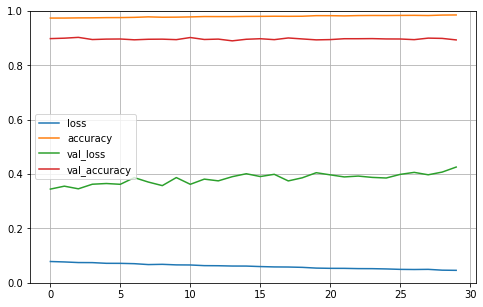

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

*You can tell that the model has not
quite converged yet, as the validation loss is still going down, so you should probably
continue training. It’s as simple as calling the fit() method again, since Keras just
continues training where it left off (you should be able to reach close to 89% validation
accuracy).*

In [109]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 94.2362 - accuracy: 0.8532


[94.23624420166016, 0.8532000184059143]

*If you are not satisfied with the performance of your model, you should go back and
tune the hyperparameters. The first one to check is the learning rate. If that doesn’t
help, try another optimizer (and always retune the learning rate after changing any
hyperparameter). If the performance is still not great, then try tuning model hyperparameters
such as the number of layers, the number of neurons per layer, and the
types of activation functions to use for each hidden layer. You can also try tuning
other hyperparameters, such as the batch size (it can be set in the fit() method using
the batch_size argument, which defaults to 32).*

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 62ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [80]:
y_pred = model.predict(X_new)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(np.array(class_names)[y_pred])

1/1 [==============================] - 0s 0s/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle boot' 'Pullover' 'Trouser']


1/1 [==============================] - 0s 16ms/step


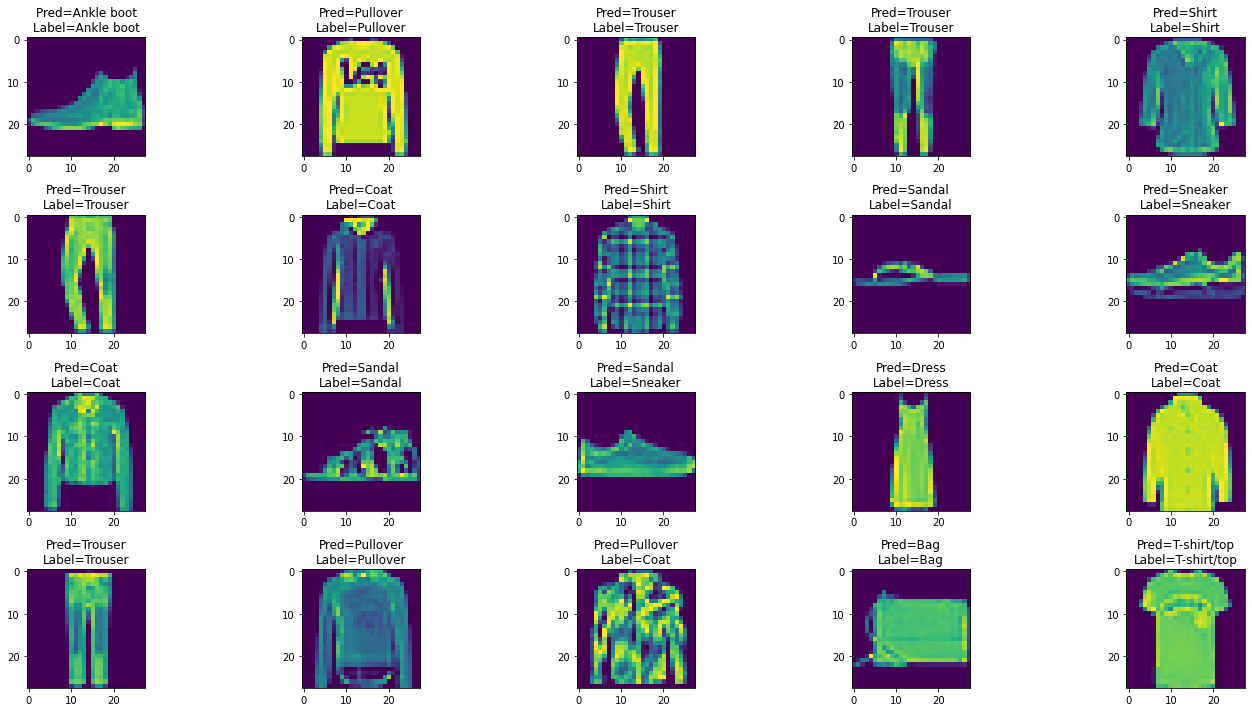

In [104]:
n = 20
fig, ax = plt.subplots(int(np.ceil(n/5)), 5, figsize=(n,n/2))

y_pred = model.predict(X_test[:n]) # create predictions for n samples
y_pred = np.argmax(y_pred, axis=1) # get the index of the prediction, across each row (sample)
pred_names = np.array(class_names)[y_pred] # get the class names of the predictions
label_names = np.array(class_names)[y_test[:n]] # get the class names of the true labels

for i in range(n):
    ind = np.unravel_index(i, ax.shape)
    ax[ind].imshow(X_test[i], interpolation='nearest')
    ax[ind].set_title('Pred=' + pred_names[i] + '\n' + 'Label=' + label_names[i])
plt.tight_layout()
plt.show()